In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
credits = pd.read_csv('tmdb_5000_credits.csv')
credits.columns = ['id','original_title', 'cast','crew']
credit = credits[['id', 'original_title']]
credit.head()

,id,original_title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


In [218]:
movies = pd.read_csv('tmdb_5000_movies.csv')
# movies.head() 

In [56]:
mov_cred = credit.merge(movies, how = 'outer', on = ['id', 'original_title']).fillna(0)

In [217]:
mov_cred['budget'] = mov_cred.budget.astype('int64')
mov_cred['revenue'] = mov_cred.revenue.astype('int64')
# mov_cred.head()

In [207]:
mov_cred_df = mov_cred[['original_title','budget','revenue']].sort_values('budget', ascending=False).head(10)

mov_cred_df

,original_title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
6,Tangled,260000000,591794936
5,Spider-Man 3,258000000,890871626
13,The Lone Ranger,255000000,89289910
26,Captain America: Civil War,250000000,1153304495
22,The Hobbit: The Desolation of Smaug,250000000,958400000


###Опредилим топ 10 фильмов с максимальным бюджетом с помощью столбчатой диаграммы.

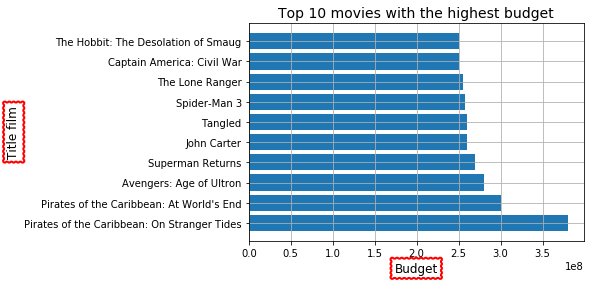

In [126]:
plt.barh(mov_cred_df['original_title'], mov_cred_df['budget'])
plt.xlabel('Budget',
            fontsize = 12,    
            color = 'black',    
            bbox = {'boxstyle': 'roundtooth',    
                    'pad': 0.4,     
                    'facecolor': 'white',    
                    'edgecolor': 'red',    
                    'linewidth': 2})
plt.ylabel('Title film',
            fontsize = 12,    
            color = 'black',    
            bbox = {'boxstyle': 'roundtooth',    
                    'pad': 0.4,     
                    'facecolor': 'white',    
                    'edgecolor': 'red',    
                    'linewidth': 2})
plt.title('Top 10 movies with the highest budget',
            fontsize = 14,    
            color = 'black')

plt.grid(

Построим круговую диаграмму сравним топ 5 популярных видео. Из данной диаграммы видно, что наиболее папулярным является видео "Minions".

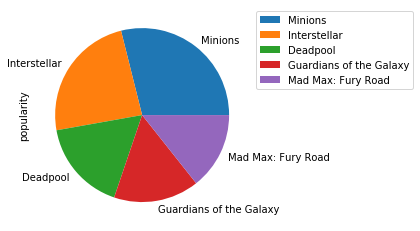

In [166]:
mov_popularity = mov_cred.groupby(['original_title']).sum().sort_values(by='popularity', ascending=False).head(5)
# name_dynamics
ax = mov_popularity.plot(kind='pie', y='popularity')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

Посмотрим зависимость потраченного бюджета, прибыли и оценок полученные при просмотре. 
При анализе бюджета и прибыли полученной при просмотре видно, что небольшое количество фильмов прибыли привысила затраты. 
Также видно что у большинству фильмов проставлена оценка от 7 до 9 баллов.

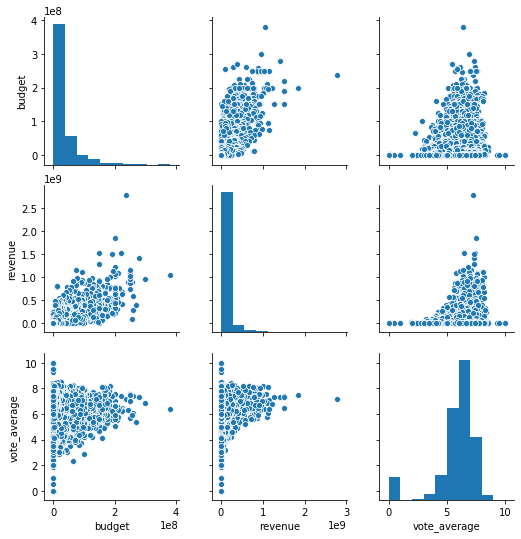

In [128]:
sns_plot = sns.pairplot(
    mov_cred[['budget', 'revenue', 'vote_average']])
sns_plot

На визуализации указанной ниже можно проследить взаимосвязь популярности видео и проставленных оценок(чем популярнее видео, тем больше его оценка)

In [222]:
mov_popularity = mov_cred[['original_title','popularity','vote_average']]

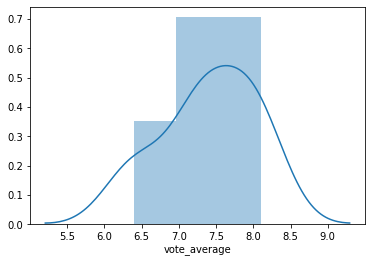

In [228]:
sns.distplot(mov_popularity.vote_average)

Посмотрим взаимосвязь количества просмотров и проставленных оценок.

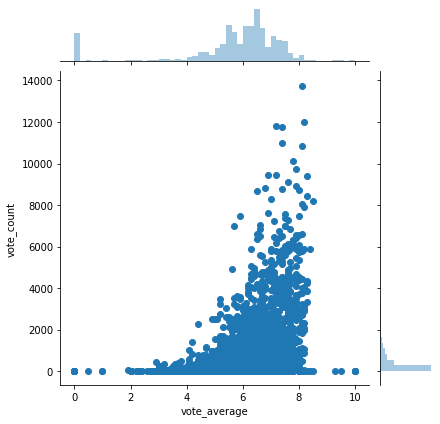

In [145]:
sns.jointplot(x='vote_average', y='vote_count', 
              data=mov_cred, kind='scatter')